In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

Подготовка данных.

In [4]:
TRAIN_DS_PATH = '/home/dreamwall/Study/analysis algorythms/Course_project/train.csv'
TEST_DS_PATH = '/home/dreamwall/Study/analysis algorythms/Course_project/test.csv'

In [5]:
pd.read_csv(TRAIN_DS_PATH)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.0,2.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,79.0,0
9996,9996,53.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0
9997,9997,44.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0,0
9998,9998,41.0,0.0,1700.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0


In [6]:
train_ds = pd.read_csv(TRAIN_DS_PATH) # весь датасет

In [7]:
train_ds.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


Убираем колонку 'Id'

In [8]:
train_ds = train_ds.drop('Id', axis=1)

##### обзор данных

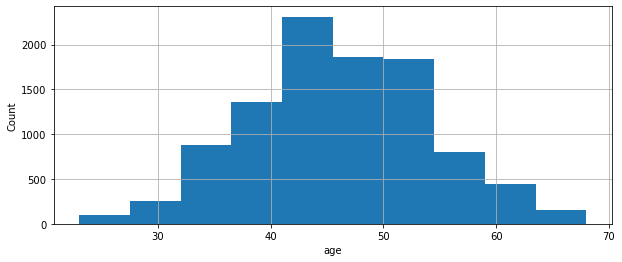

In [9]:
plt.figure(figsize = (10, 4))

train_ds['age'].hist()
plt.ylabel('Count')
plt.xlabel('age')
plt.show()



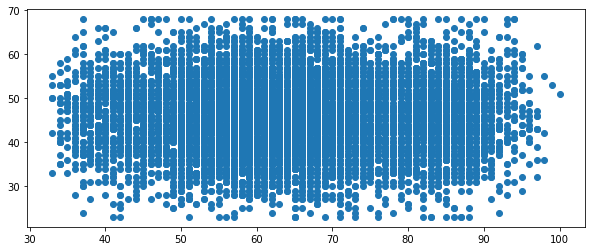

In [10]:
plt.figure(figsize = (10, 4))

plt.scatter(train_ds['mean_exam_points'], train_ds['age'])

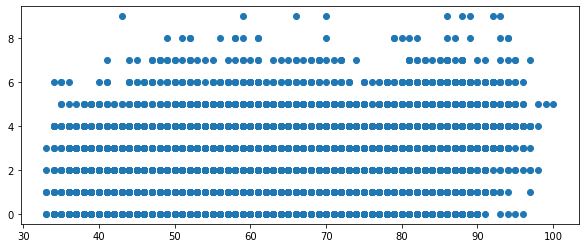

In [11]:
plt.figure(figsize = (10, 4))

plt.scatter(train_ds['mean_exam_points'], train_ds['years_of_experience'])

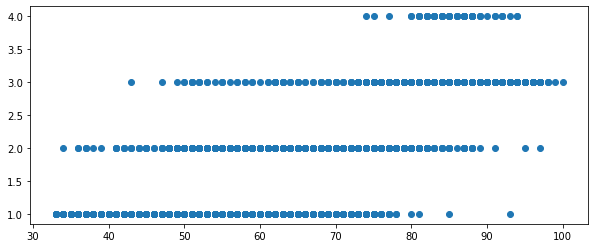

In [12]:
plt.figure(figsize = (10, 4))

plt.scatter(train_ds['mean_exam_points'], train_ds['qualification'])

Возраст, годы опыта не сильно влияют на результат экзамена
Квалификация увеличивает результат экзамена

##### Подготовка данных для модели

In [13]:
train_labels = train_ds['choose'] # ответы

In [14]:
train_data = train_ds.drop('choose', axis=1) # датасет без ответов

In [15]:
train_labels = train_labels.to_numpy()

In [16]:
train_data = train_data.to_numpy()

In [17]:
train_data.shape # проверка, что все сохранилось

(10000, 11)

In [18]:
train_labels.shape

(10000,)

Далее реализация Random Forest c OOB ошибкой. как на уроках.

In [19]:
def get_oob_indeces(sample_ids):
    indeces = np.arange(len(sample_ids))
    return indeces[~np.isin(indeces, sample_ids)]

In [20]:
np.random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0] 
    bootstrap_oob = []
    
    for i in range(N):
        
        sample_index = np.random.randint(0, n_samples, size=n_samples)
        
        b_data = data[sample_index]
        b_labels = labels[sample_index]
        oob_indeces = get_oob_indeces(sample_index)
        
        bootstrap_oob.append((b_data, b_labels, oob_indeces))
        
    return bootstrap_oob

In [21]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = list(range(len_sample))

    len_subsample = int(np.sqrt(len_sample))
    
    subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

    return subsample

In [22]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  
        self.t = t  
        self.true_branch = true_branch  
        self.false_branch = false_branch  

In [23]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
       
        classes = {}  
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
            
           
        prediction = max(classes, key=classes.get)
        return prediction        

In [24]:
def gini(labels):
   
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [25]:
def gain(left_labels, right_labels, root_gini):

    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return root_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [26]:
def split(data, labels, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [27]:
def find_best_split(data, labels):
    
    min_leaf_samples = 5

    root_gini = gini(labels)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    feature_subsample_indices = get_subsample(n_features) 
    
    for index in feature_subsample_indices:
     
        t_values = np.unique(data[:, index])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            if len(true_data) < min_leaf_samples or len(false_data) < min_leaf_samples:
                continue
            
            current_gain = gain(true_labels, false_labels, root_gini)
            
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [28]:
def build_tree(data, labels):
    
    dep = 0
#     max_depth = 
    gain, t, index = find_best_split(data, labels)

    if gain == 0:
        return Leaf(data, labels)
    
#     if dep == max_depth:
#         return Leaf(data, labels)
#     else:
#         dep += 1

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    return Node(index, t, true_branch, false_branch)

In [29]:
def classify_object(obj, node):

    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [30]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [31]:
def predict_oob(oob_predictions, oob_indeces, tree, data):
    oob_data = data[oob_indeces]
    prediction = predict(oob_data, tree)
    
    for i in range(len(oob_indeces)):
        oob_predictions[oob_indeces[i], prediction[i]] += 1
    return oob_predictions

In [32]:
def random_forest(data, labels, n_trees):
    forest = []
    oob_predictions = np.zeros((data.shape[0], len(set(labels))))
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels, oob_indeces in bootstrap:
        tree = build_tree(b_data, b_labels)
        forest.append(build_tree(b_data, b_labels))
        
        oob_predictions = predict_oob(oob_predictions = oob_predictions,
                                     oob_indeces = oob_indeces,
                                     tree = tree,
                                     data = data)
        
        oob_score = accuracy_metric(labels, np.argmax(oob_predictions, axis=1))
        
        
    return forest, oob_score

In [33]:
def tree_vote(forest, data):

    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))

    predictions_per_object = list(zip(*predictions))

    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [34]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [35]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

##### Так же разбиваем выборку на трэйн и тест.

In [36]:
train_data = standard_scale(train_data)

In [37]:
train_data

array([[-1.34508978e+00, -1.11773006e+00,  8.54508832e-01, ...,
        -1.68787291e-01, -1.35388105e-01,  7.03586704e-01],
       [ 7.72004745e-01,  1.42631140e-02, -8.63826025e-01, ...,
        -1.68787291e-01,  7.38617327e+00, -5.46933324e-01],
       [-2.09229961e+00,  5.80259700e-01,  9.08044509e-02, ...,
        -1.68787291e-01, -1.35388105e-01,  1.15106691e-01],
       ...,
       [-2.24275031e-01,  1.71225287e+00,  9.08044509e-02, ...,
        -1.68787291e-01,  7.38617327e+00, -3.99813321e-01],
       [-5.97879947e-01, -1.11773006e+00, -4.65859672e-03, ...,
        -1.68787291e-01, -1.35388105e-01,  5.56466700e-01],
       [-5.97879947e-01,  1.71225287e+00, -9.59289073e-01, ...,
        -1.68787291e-01, -1.35388105e-01, -1.79745335e+00]])

In [38]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, 
                                                                    train_labels,
                                                                    test_size=0.25,
                                                                    random_state=1)

In [39]:
train_labels.shape

(7500,)

Подбор наиболее подходящего количества деревьев в лесу.

In [40]:
%%time
n_trees = [1, 3, 5, 7, 10, 15, 20, 25, 50, 100]
oobs = []
train_accuracy = []
test_accuracy = []

for tree in n_trees:
    forest, oob_scores = random_forest(train_data, train_labels, tree)
    train_answers = tree_vote(forest, train_data)
    test_answers = tree_vote(forest, test_data)
    oobs.append(oob_scores)
    train_accuracy.append(accuracy_metric(train_labels, train_answers))
    test_accuracy.append(accuracy_metric(test_labels, test_answers))

CPU times: user 5min 42s, sys: 160 ms, total: 5min 42s
Wall time: 5min 42s


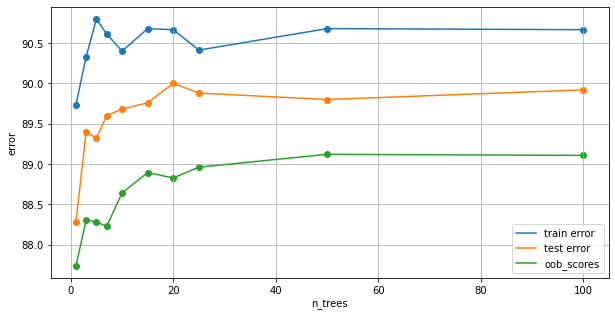

In [41]:
# График accuracy на Train и Test

plt.figure(figsize = (10, 5))
plt.xlabel('n_trees')
plt.ylabel('error')
plt.grid()
plt.plot(n_trees, train_accuracy, label='train error')
plt.plot(n_trees, test_accuracy, label='test error')
plt.plot(n_trees, oobs, label='oob_scores')
plt.scatter(n_trees, train_accuracy)
plt.scatter(n_trees, test_accuracy)
plt.scatter(n_trees, oobs)
plt.legend(loc='lower right')
plt.show()

Выбираем количество дервьев равное 100

In [42]:
%%time
my_forest, oob_score = random_forest(train_data, train_labels, 100)
oob_score

CPU times: user 2min 25s, sys: 28 ms, total: 2min 25s
Wall time: 2min 25s


89.17333333333333

In [43]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest, train_data)

In [44]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest, test_data)

In [45]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(train_labels, train_answers)
print(f'Точность случайного леса из 100 деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, test_answers)
print(f'Точность случайного леса из 100 деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 100 деревьев на обучающей выборке: 90.840
Точность случайного леса из 100 деревьев на тестовой выборке: 89.880


##### Подготовка валидационного сета

In [46]:
pd.read_csv(TEST_DS_PATH)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,44.0,3.0,1850.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,68.0
9996,19996,45.0,3.0,2450.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,72.0
9997,19997,44.0,2.0,1250.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,63.0
9998,19998,51.0,5.0,1000.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,64.0


In [47]:
val_ds = pd.read_csv(TEST_DS_PATH)

In [48]:
ids = pd.DataFrame(val_ds['Id'])

In [49]:
val_ds = val_ds.drop('Id', axis=1)

In [50]:
val_ds = val_ds.to_numpy()

In [51]:
val_ds = standard_scale(val_ds)

In [52]:
val_ds_answers = tree_vote(my_forest, val_ds)

In [53]:
val_ds_answers_pd = pd.DataFrame(val_ds_answers)

In [54]:
val_ds_answers_pd = val_ds_answers_pd.rename(columns = {0: 'choose'})

In [55]:
result = ids.join(val_ds_answers_pd)

In [56]:
result

,Id,choose
0,10000,0
1,10001,0
2,10002,0
3,10003,0
4,10004,0
...,...,...
9995,19995,0
9996,19996,0
9997,19997,1
9998,19998,1


In [57]:
RESULT_PATH = '/home/dreamwall/Study/analysis algorythms/Course_project/test_answers_17.csv'

In [58]:
result.to_csv(RESULT_PATH, index=False)